In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Validation test Predictions

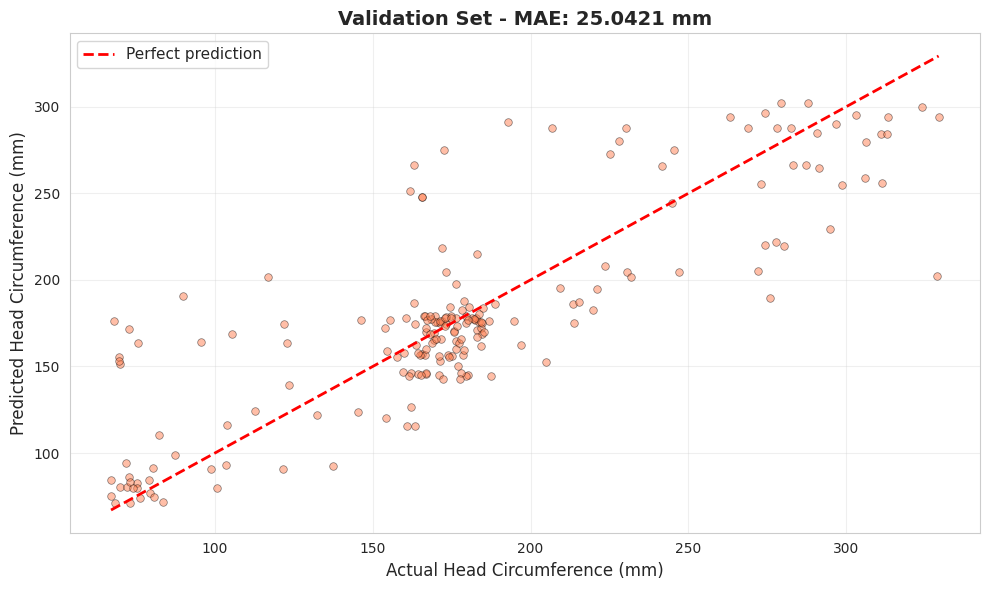

In [ ]:
# Load data
train_df = pd.read_csv('/content/drive/MyDrive/Lab_2/training_set_pixel_size_and_HC.csv')
X = train_df[['pixel size(mm)']]
y = train_df['head circumference (mm)']
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# Result
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
train_mae = mean_absolute_error(y_train, y_train_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.5, s=30, color='coral', edgecolors='black', linewidth=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()],
         'r--', lw=2, label='Perfect prediction')
plt.xlabel('Actual Head Circumference (mm)', fontsize=12)
plt.ylabel('Predicted Head Circumference (mm)', fontsize=12)
plt.title(f'Validation Set - MAE: {val_mae:.4f} mm', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()